In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tf.random.set_seed(42)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)

57026/57026 [==============================] - 0s 1us/step


In [7]:
x_train.shape

(404, 13)

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[13]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.mae
              )

#model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               1400      
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2421 (9.46 KB)
Trainable params: 2421 (9.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
epochs = 300
history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

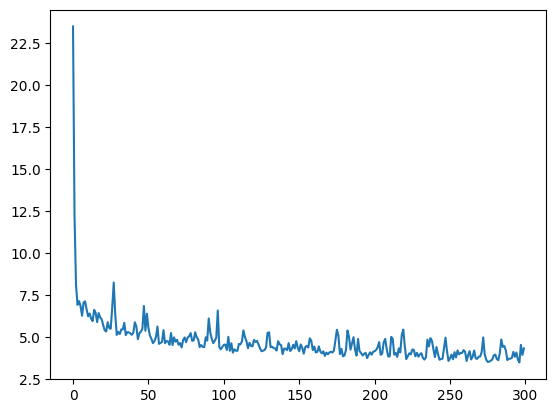

In [31]:
plt.plot(history.history['loss'])

In [25]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5.0724 - mean_absolute_error: 5.0724


[5.072409152984619, 5.072409152984619]

In [32]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


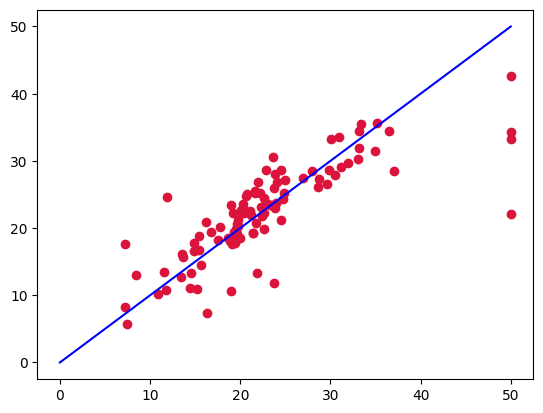

In [45]:
plt.scatter(x=y_test, y=prediction,color='crimson')
p1 = 0
p2 = 50
plt.plot([p1, p2], [p1, p2], 'b-')
plt.show()